In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
traindf = pd.read_csv('training_set_VU_DM.csv')
testdf = pd.read_csv('test_set_VU_DM.csv')


# Code to change the data type of columns that are id to object 
id_columns = traindf.select_dtypes(include='int64').columns[traindf.select_dtypes(include='int64').columns.str.endswith('_id')]
id_columns = testdf.select_dtypes(include='int64').columns[testdf.select_dtypes(include='int64').columns.str.endswith('_id')]

# Change the data types of identified columns
traindf[id_columns] = traindf[id_columns].astype('object')
testdf[id_columns] = testdf[id_columns].astype('object')




/var/folders/8q/v2_821r57sl99cmfwhtgcym40000gn/T/ipykernel_94810/2008688904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = traindf.corr()


<AxesSubplot: >

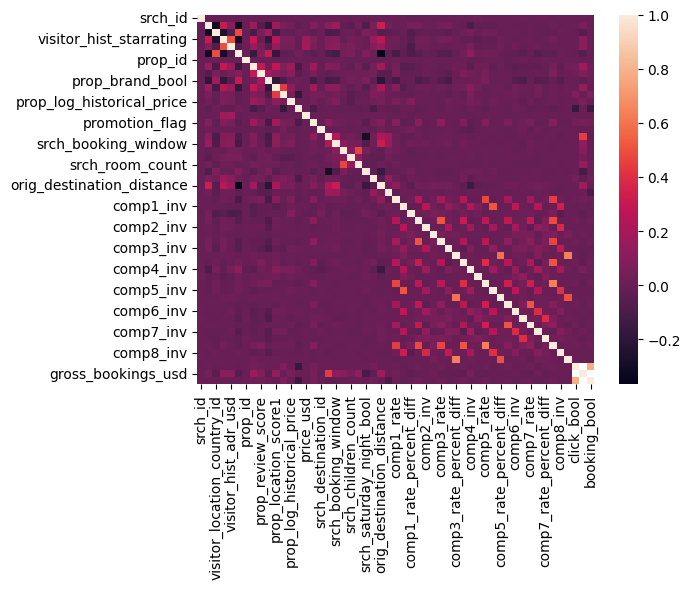

In [12]:
corr = traindf.corr()
sns.heatmap(corr)

# No. of hotel destination locations searched from each users locations

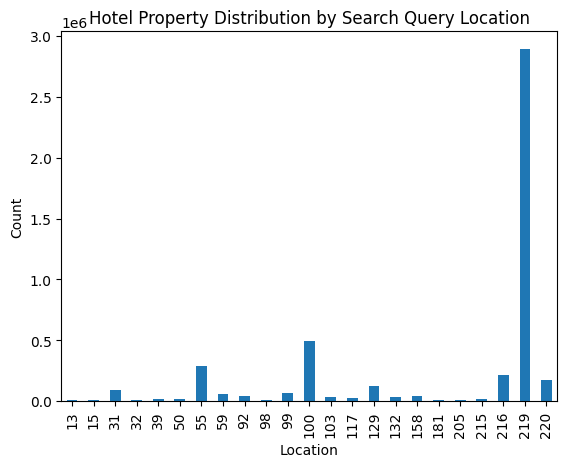

In [22]:
location_counts = traindf.groupby('visitor_location_country_id')['position'].count()

# Filter locations with a significant count (e.g., greater than a threshold)
threshold = 10000  # Adjust the threshold as per your preference
significant_locations = location_counts[location_counts > threshold]

# Create the bar plot for significant locations
significant_locations.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Hotel Property Distribution by Search Query Location')
plt.show()

In [3]:
traindf.dtypes

srch_id                         object
date_time                       object
site_id                         object
visitor_location_country_id     object
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                 object
prop_id                         object
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id             object
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [4]:
len(traindf.columns)

54

In [5]:
traindf

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Specify the file paths for the training and test CSV files
train_file_path = 'path/to/train.csv'
test_file_path = 'path/to/test.csv'

# Read the training and test data from CSV files

# Select the relevant columns from the DataFrame
train_columns = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating',
           'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_id', 'srch_id',
           'prop_location_score2', 'prop_log_historical_price',
           'price_usd', 'promotion_flag', 'srch_length_of_stay',
           'srch_booking_window', 'srch_adults_count', 'srch_children_count',
           'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score',
           'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
           'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
           'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
           'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
           'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
           'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
           'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
           'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
           'comp8_rate_percent_diff', 'click_bool', 'booking_bool']

test_columns = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_starrating',
           'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_id', 'srch_id',
           'prop_location_score2', 'prop_log_historical_price', 
           'price_usd', 'promotion_flag', 'srch_length_of_stay',
           'srch_booking_window', 'srch_adults_count', 'srch_children_count',
           'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score',
           'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
           'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
           'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
           'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
           'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
           'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
           'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
           'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
           'comp8_rate_percent_diff']

# Select the relevant columns from the training and test DataFrames
train_features = traindf[train_columns].copy()
test_features = testdf[test_columns].copy()

# Separate features and target labels
X_train = train_features.drop(columns=['click_bool', 'booking_bool'])
y_train = train_features['click_bool']  # Use 'click_bool' as the target variable

# X_test = test_features.drop(columns=['click_bool', 'booking_bool'])
X_test = test_features
# y_test = test_features['click_bool']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)


In [22]:
set(predictions)

{0, 1}

In [20]:
set(train_columns)-set(test_columns)

{'booking_bool', 'click_bool', 'position'}